In [1]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt

In [2]:
# Get data
symbol = "BTCUSDT"
timeFrame = "15m"
startDate = "2022-07-21"
endDate = "2022-07-22"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,23223.30,23350.00,23200.00,23318.27,2029.08799,2022-07-21 00:00:00
1,23320.68,23386.56,23263.24,23275.65,1505.19823,2022-07-21 00:15:00
2,23275.65,23282.09,23125.00,23156.40,1582.39682,2022-07-21 00:30:00
3,23156.40,23276.81,23122.34,23249.70,1408.24589,2022-07-21 00:45:00
4,23249.70,23442.77,23228.95,23387.75,2290.69307,2022-07-21 01:00:00
...,...,...,...,...,...,...
92,23017.08,23150.00,23000.17,23089.79,1121.40567,2022-07-21 23:00:00
93,23092.93,23209.79,23084.12,23185.17,1278.26387,2022-07-21 23:15:00
94,23185.17,23233.09,23091.51,23127.78,1206.48907,2022-07-21 23:30:00
95,23126.28,23210.00,23088.75,23152.19,1120.73701,2022-07-21 23:45:00


In [3]:
# Grid strategy
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "buy_unit" : 0.0001,                              ## float
    "grid_number" : 50,                               ## int  
    "equal_Diff_or_Ratio" : "DIFF",                   ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "protion":0.0},   ## "type": "long", "short" | "None". "portion" : float
    "lowest_price" : 18000.0,                         ## float
    "highest_price" : 24000.0                         ## float
}
myGrid = Strategies.Grid(grid_parameters)
# Buy and hold
buy_and_hold_parameters = {
    "name":"buy and hold",                            ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "buy_unit" : 0.0001,                              ## float
}
buy_and_hodl = Strategies.Buy_and_Hold(buy_and_hold_parameters)

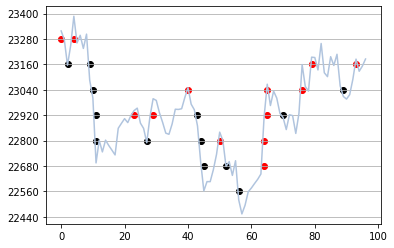

strategy: grid , trading count: 26 , profit: 0.0005115419999990536 , sharpe ratio: nan


/home/lager/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/lager/.local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/lager/.local/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lager/.local/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/lager/.local/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


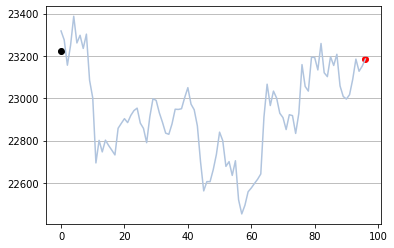

strategy: buy and hold , trading count: 2 , profit: -0.0016186330108124232 , sharpe ratio: nan


In [4]:
profit, trading_count, buy_record, sell_record = myGrid.back_test(df)
sharpe_ratio = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(myGrid, df, 0.02, window_size=100, window_off=100)
print("strategy:", myGrid.name, ", trading count:", trading_count, ", profit:", profit, ", sharpe ratio:", sharpe_ratio)

profit, trading_count, buy_record, sell_record = buy_and_hodl.back_test(df)
sharpe_ratio = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=100, window_off=100)
print("strategy:", buy_and_hodl.name, ", trading count:", trading_count, ", profit:", profit, ", sharpe ratio:", sharpe_ratio)

=====Initial State=====
>> strategy: buy and hold
>> money: 1000.0
>> storage: 0.0
>> guarantee money: None
>> trading count: 0
Total value: 1000.0
Profit: 0.0
Current price: 0
Time: 2022-08-13 12:01:50.525208

>> strategy: buy and hold
>> money: 0.0
>> storage: 0.04039308938869503
>> guarantee money: None
>> trading count: 1
Total value: 1000.0
Profit: 0.0
Current price: 24756.71
Time: 2022-08-13 12:01:50.571880

>> strategy: buy and hold
>> money: 1000.3695967679066
>> storage: 0.0
>> guarantee money: None
>> trading count: 2
Total value: 1000.3695967679066
Profit: 0.00036959676790661436
Current price: 24765.86
Time: 2022-08-13 12:02:01.449681



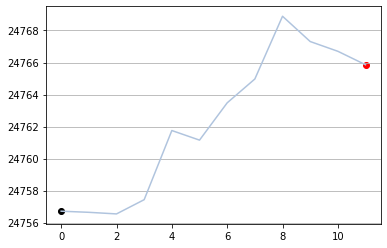

In [5]:
buy_and_hodl.intime_test("BTCUSDT", "00:00:01,000", "00:00:10,000")

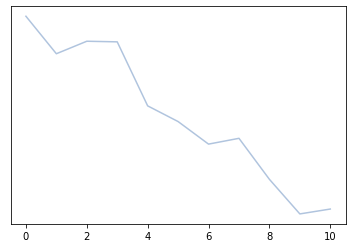

In [6]:
# Grid strategy
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "buy_unit" : 0.0001,                              ## float
    "grid_number" : 200,                               ## int  
    "equal_Diff_or_Ratio" : "DIFF",                   ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "protion":0.0},   ## "type": "long", "short" | "None". "portion" : float
    "lowest_price" : 24600,                         ## float
    "highest_price" : 24800.0                         ## float
}
myGrid.intime_test("BTCUSDT", "00:00:01,000", "00:00:10,000")
